## Bigmart Vendas
O varejo é outro setor que utiliza extensivamente a análise para otimizar os processos de negócios. Tarefas como posicionamento de produtos, gerenciamento de inventário, ofertas personalizadas, empacotamento de produtos etc. estão sendo manipuladas de maneira inteligente usando técnicas de ciência de dados. Como o nome sugere, esses dados são compostos por registros de transações de uma loja de vendas. Este é um problema de regressão.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Os dados possuem 14204 linhas e 12 variáveis.
df = pd.read_csv('bases/marketSales.csv')
print(len(df), 'linhas')
df.head()

14204 linhas


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [4]:
# Limpeza dos valores nulos
# ERRADO: df.dropna(how='any',inplace=True)
df = df.drop(df[df['Item_Outlet_Sales'].isnull()].index)
# Retirar o campo Item_Identifier
df = df.drop(columns=['Item_Identifier','Outlet_Identifier'], axis=1)
print(len(df), 'linhas')
df.head()

8523 linhas


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 732.4+ KB


In [6]:
df = df.drop(columns=['Item_Weight', 'Outlet_Size'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8523 non-null   object 
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Location_Type       8523 non-null   object 
 6   Outlet_Type                8523 non-null   object 
 7   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 599.3+ KB


In [7]:
print("Gordura:", df['Item_Fat_Content'].unique())
print("Tipo:", df['Item_Type'].unique())
print("Loc. Loja:", df['Outlet_Location_Type'].unique())
print("Tipo Loja:", df['Outlet_Type'].unique())

Gordura: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Tipo: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Loc. Loja: ['Tier 1' 'Tier 3' 'Tier 2']
Tipo Loja: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [8]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'LF': 1, 'Low Fat': 1, 'low fat': 1, 'reg': 2, 'Regular': 2})
df['Item_Fat_Content'] = df['Item_Fat_Content'].astype(pd.Int64Dtype())
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype(pd.Int64Dtype())
df['Outlet_Type'] = df['Outlet_Type'].map({'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3, 'Grocery Store': 4})
df['Outlet_Type'] = df['Outlet_Type'].astype(pd.Int64Dtype())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8523 non-null   Int64  
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Location_Type       8523 non-null   Int64  
 6   Outlet_Type                8523 non-null   Int64  
 7   Item_Outlet_Sales          8523 non-null   float64
dtypes: Int64(3), float64(3), int64(1), object(1)
memory usage: 624.2+ KB


In [9]:
# Transformação do tipo do item em Categóricas
df['Item_Type'] = df.Item_Type.astype('category')
print(df.dtypes)

Item_Fat_Content                Int64
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Establishment_Year       int64
Outlet_Location_Type            Int64
Outlet_Type                     Int64
Item_Outlet_Sales             float64
dtype: object


In [10]:
# De categóricas para numéricas
le_Item_Type = LabelEncoder()
df['Item_Type'] = le_Item_Type.fit_transform(df['Item_Type'])
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,0.016047,4,249.8092,1999,1,1,3735.1380
1,2,0.019278,14,48.2692,2009,3,2,443.4228
2,1,0.016760,10,141.6180,1999,1,1,2097.2700
3,2,0.000000,6,182.0950,1998,3,4,732.3800
4,1,0.000000,9,53.8614,1987,3,1,994.7052


In [11]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8523 non-null   Int64  
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   int64  
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Location_Type       8523 non-null   Int64  
 6   Outlet_Type                8523 non-null   Int64  
 7   Item_Outlet_Sales          8523 non-null   float64
dtypes: Int64(3), float64(3), int64(2)
memory usage: 624.2 KB
None


,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,1.352693,0.066132,7.226681,140.992782,1997.831867,2.112871,1.709492,2181.288914
std,0.477836,0.051598,4.209990,62.275067,8.371760,0.812757,1.089985,1706.499616
min,1.000000,0.000000,0.000000,31.290000,1985.000000,1.000000,1.000000,33.290000
25%,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,1.000000,834.247400
50%,1.000000,0.053931,6.000000,143.012800,1999.000000,2.000000,1.000000,1794.331000
75%,2.000000,0.094585,10.000000,185.643700,2004.000000,3.000000,2.000000,3101.296400
max,2.000000,0.328391,15.000000,266.888400,2009.000000,3.000000,4.000000,13086.964800


In [13]:
target = df['Item_Outlet_Sales']
df = df.drop(columns=['Item_Outlet_Sales'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = .2)
print('Amostra de Treino:', X_train.shape)
print('Amostra de Teste:', X_test.shape)

Amostra de Treino: (6818, 7)
Amostra de Teste: (1705, 7)


In [14]:
clf = LinearRegression()
clf.fit(X_train, y_train)
print('Acurácia: ', clf.score(X_test, y_test))

Acurácia:  0.4206112475685748


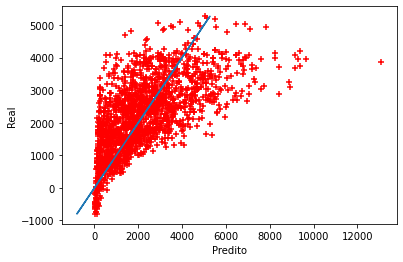

In [16]:
y_pred = clf.predict(X_test)
plt.plot(y_pred, y_pred)
plt.scatter(y_test, y_pred, c = 'red', marker='+')
plt.ylabel('Real')
plt.xlabel('Predito')
plt.show()

Até a próxima \
Fernando Anselmo